<a href="https://colab.research.google.com/github/Asthnesis/Python-codes/blob/main/Assignment2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/assignment.csv')
#Check for missing values marked as -1 if any
print(df[(df['Number_of_Casualties'].isnull()) | (df['Age_of_Driver'].isnull())])
print(df[(df['Number_of_Casualties'] == -1) | (df['Age_of_Driver'] == -1)])
#Replacing the missing values with new data
df['Age_of_Driver'].replace(-1, random.randint(21, 70), inplace=True)
df['Age_of_Driver'].fillna(random.randint(21, 70), inplace=True)
df['Number_of_Casualties'].replace(-1, random.randint(1, 5), inplace=True)
df['Number_of_Casualties'].fillna(random.randint(1, 5), inplace=True)
#Basic information about my data
print(df.describe())
print(df.info())

        Number_of_Casualties  Age_of_Driver
173628                   NaN            NaN
173629                   NaN            NaN
173630                   NaN            NaN
173631                   NaN            NaN
173632                   NaN            NaN
...                      ...            ...
175129                   NaN            NaN
175130                   NaN            NaN
175131                   NaN            NaN
175132                   NaN            NaN
175133                   NaN            NaN

[1506 rows x 2 columns]
         Number_of_Casualties  Age_of_Driver
2                         3.0           -1.0
7                         1.0           -1.0
10                        1.0           -1.0
24                        1.0           -1.0
42                        1.0           -1.0
...                       ...            ...
1046405                   3.0           -1.0
1047910                   1.0           -1.0
1048174                   1.0           -1

In [ ]:
#Drawing a scatter plot to visualize my data
#df.loc[:,['Casualty_Severity','Age_of_Driver']]
df.plot(x='Age_of_Driver', y='Number_of_Casualties', kind='scatter', marker='*', color='r')
plt.xlabel('Age of the driver')
plt.ylabel('Number of casualties')
plt.show()

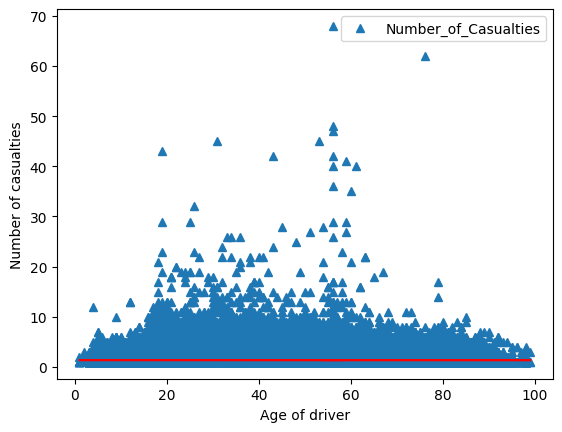

In [89]:
from sklearn.linear_model import LinearRegression
#Drawing a linear regression line and visualizing the output
x = df[['Age_of_Driver']]
y = df[['Number_of_Casualties']]
regression = LinearRegression()
regression.fit(x,y)
df.plot(x='Age_of_Driver',y='Number_of_Casualties',style='^')
plt.plot(x, regression.predict(x), color='red', label='Regression line')
plt.xlabel('Age of driver')
plt.ylabel('Number of casualties')
plt.show()

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x = df[['Age_of_Driver']]
y = df[['Number_of_Casualties']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(x_test)
print(y_pred)
y_test


In [ ]:
#Evaluating the model
from sklearn import metrics
import numpy as np
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Average E: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

In [88]:
#Saving the model
import joblib
import pickle
#Training the model
model = LinearRegression()
model.fit(x,y)
joblib.dump(model, 'assignment2.pkl')
with open('assignment2.pkl', 'wb') as file:
  pickle.dump(model, file)

In [ ]:
#Training the model on hypothetical data set
new_value_x = np.array([18,19,20]).reshape(-1,1)
model = joblib.load('assignment2.pkl')
prediction = model.predict(new_value_x)
new_df=pd.DataFrame({'x':new_value_x.flatten(), 'Predicted_y': prediction.flatten()})
print(new_df)